1.  Загрузить данные из файла “insurance.csv”

In [10]:
import pandas as pd

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


2. С помощью метода describe() посмотреть статистику по данным. Сделать выводы.

In [9]:
data_statistics = data.describe()

data_statistics

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


3.  Построить гистограммы для числовых показателей. Сделать выводы

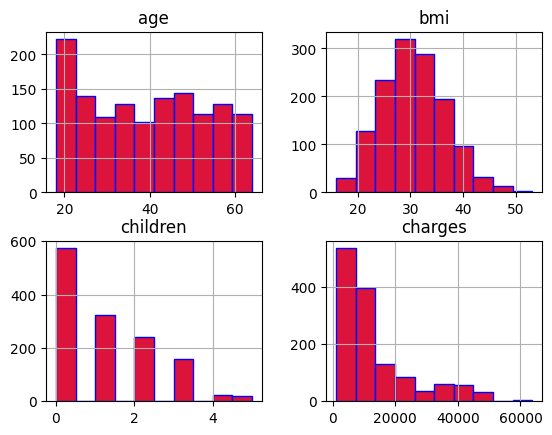

In [13]:
import matplotlib.pyplot as plt

data.hist(color='crimson', edgecolor='blue')
plt.show()

4. Найти меры центральной тенденции и меры разброса для индекса массы 
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на 
гистограммах  (3  вертикальные  линии).  Добавить  легенду  на  графики. 
Сделать выводы.

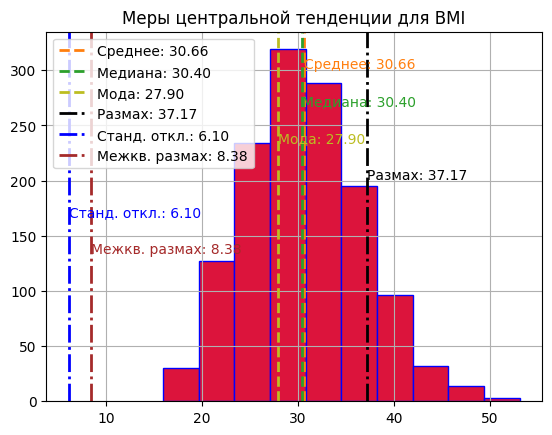

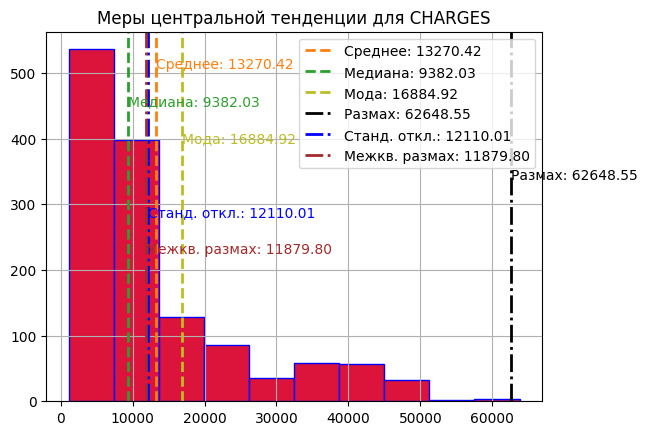

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts


sp_bmi = np.array([data.bmi])
sp_charges=np.array([data.charges])

#Центральные тенденции
mean_bmi = np.mean(sp_bmi)
moda_bmi=sts.mode(sp_bmi)
med_bmi=np.median(sp_bmi)

mean_charges = np.mean(sp_charges)
moda_charges=sts.mode(sp_charges)
med_charges=np.median(sp_charges)

#Размах
range_bmi = np.max(sp_bmi) - np.min(sp_bmi)
range_charges = np.max(sp_charges) - np.min(sp_charges)

#Стандартное отклонение
std_bmi=data['bmi'].std()
std_charges=data['charges'].std()

#Межквартальный размах
iqr_bmi=sts.iqr(data['bmi'], interpolation='midpoint')
iqr_charges=sts.iqr(data['charges'], interpolation='midpoint')


data.bmi.hist(color='crimson', edgecolor='blue')
plt.text(mean_bmi, plt.ylim()[1]*0.9, f'Среднее: {mean_bmi:.2f}', color='C1')
plt.axvline(mean_bmi, color='C1', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_bmi:.2f}')

plt.text(med_bmi, plt.ylim()[1]*0.8, f'Медиана: {med_bmi:.2f}', color='C2')
plt.axvline(med_bmi, color='C2', linestyle='dashed', linewidth=2, label=f'Медиана: {med_bmi:.2f}')

plt.text(moda_bmi.mode[0], plt.ylim()[1]*0.7, f'Мода: {moda_bmi.mode[0]:.2f}', color='C8')
plt.axvline(moda_bmi.mode[0], color='C8', linestyle='dashed', linewidth=2, label=f'Мода: {moda_bmi.mode[0]:.2f}')

plt.text(range_bmi, plt.ylim()[1]*0.6, f'Размах: {range_bmi:.2f}', color='black')
plt.axvline(range_bmi, color='black', linestyle='dashdot', linewidth=2, label=f'Размах: {range_bmi:.2f}')

plt.text(std_bmi, plt.ylim()[1]*0.5, f'Станд. откл.: {std_bmi:.2f}', color='b')
plt.axvline(std_bmi, color='b', linestyle='dashdot', linewidth=2, label=f'Станд. откл.: {std_bmi:.2f}')

plt.text(iqr_bmi, plt.ylim()[1]*0.4, f'Межкв. размах: {iqr_bmi:.2f}', color='brown')
plt.axvline(iqr_bmi, color='brown', linestyle='dashdot', linewidth=2, label=f'Межкв. размах: {iqr_bmi:.2f}')

plt.title("Меры центральной тенденции для BMI")
plt.legend()
plt.show()


data.charges.hist(color='crimson', edgecolor='blue')
plt.text(mean_charges, plt.ylim()[1]*0.9, f'Среднее: {mean_charges:.2f}', color='C1')
plt.axvline(mean_charges, color='C1', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_charges:.2f}')

plt.text(med_charges, plt.ylim()[1]*0.8, f'Медиана: {med_charges:.2f}', color='C2')
plt.axvline(med_charges, color='C2', linestyle='dashed', linewidth=2, label=f'Медиана: {med_charges:.2f}')

plt.text(moda_charges.mode[0], plt.ylim()[1]*0.7, f'Мода: {moda_charges.mode[0]:.2f}', color='C8')
plt.axvline(moda_charges.mode[0], color='C8', linestyle='dashed', linewidth=2, label=f'Мода: {moda_charges.mode[0]:.2f}')

plt.text(range_charges, plt.ylim()[1]*0.6, f'Размах: {range_charges:.2f}', color='black')
plt.axvline(range_charges, color='black', linestyle='dashdot', linewidth=2, label=f'Размах: {range_charges:.2f}')

plt.text(std_charges, plt.ylim()[1]*0.5, f'Станд. откл.: {std_charges:.2f}', color='b')
plt.axvline(std_charges, color='b', linestyle='dashdot', linewidth=2, label=f'Станд. откл.: {std_charges:.2f}')

plt.text(iqr_charges, plt.ylim()[1]*0.4, f'Межкв. размах: {iqr_charges:.2f}', color='brown')
plt.axvline(iqr_charges, color='brown', linestyle='dashdot', linewidth=2, label=f'Межкв. размах: {iqr_charges:.2f}')

plt.title("Меры центральной тенденции для CHARGES")
plt.legend()
plt.show()



5. Построить box-plot для числовых показателей. Названия графиков должны 
соответствовать названиям признаков. Сделать выводы. 

C:\Users\Ева\AppData\Local\Temp\ipykernel_15264\3519361638.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['age'], data['bmi'], data['children'], data['charges']],


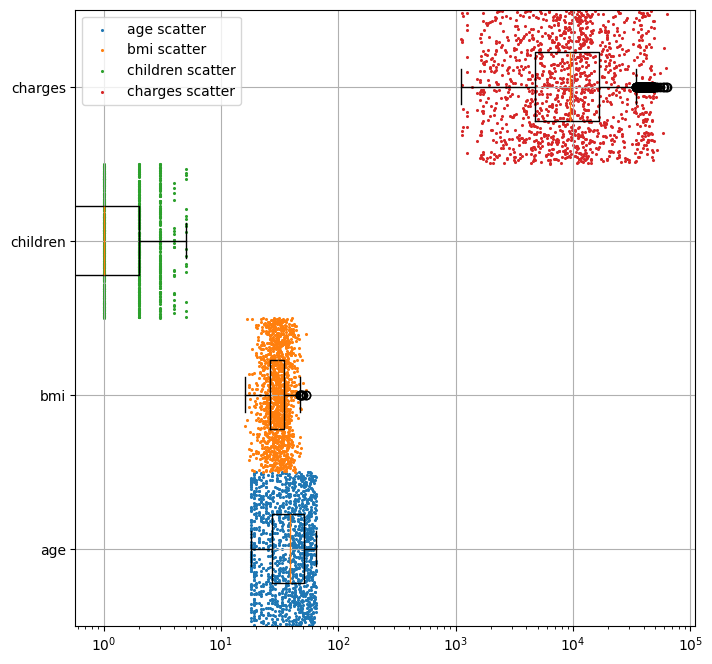

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(8,8))

y_age = np.random.uniform(0.5, 1.5, size=len(data['age']))         # Для 'age' с небольшим разбросом
y_bmi = np.random.uniform(1.5, 2.5, size=len(data['bmi']))         # Для 'bmi'
y_children = np.random.uniform(2.5, 3.5, size=len(data['children']))  # Для 'children'
y_charges = np.random.uniform(3.5, 4.5, size=len(data['charges']))  # Для 'charges'

plt.boxplot([data['age'], data['bmi'], data['children'], data['charges']],
            labels=['age', 'bmi', 'children', 'charges'], vert=False)

plt.scatter(data['age'], y_age, s=1.5, label='age scatter')
plt.scatter(data['bmi'], y_bmi, s=1.5, label='bmi scatter')
plt.scatter(data['children'], y_children, s=1.5, label='children scatter')
plt.scatter(data['charges'], y_charges, s=1.5, label='charges scatter')

plt.xscale('log')
 
plt.grid()
plt.legend()
plt.show()


6. Используя  признак  charges или  imb,  проверить,  выполняется  ли 
центральная предельная теорема. Использовать различные длины выборок 
n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти 
стандартное  отклонение  и  среднее  для полученных  распределений. 
Сделать выводы.

CHARGES


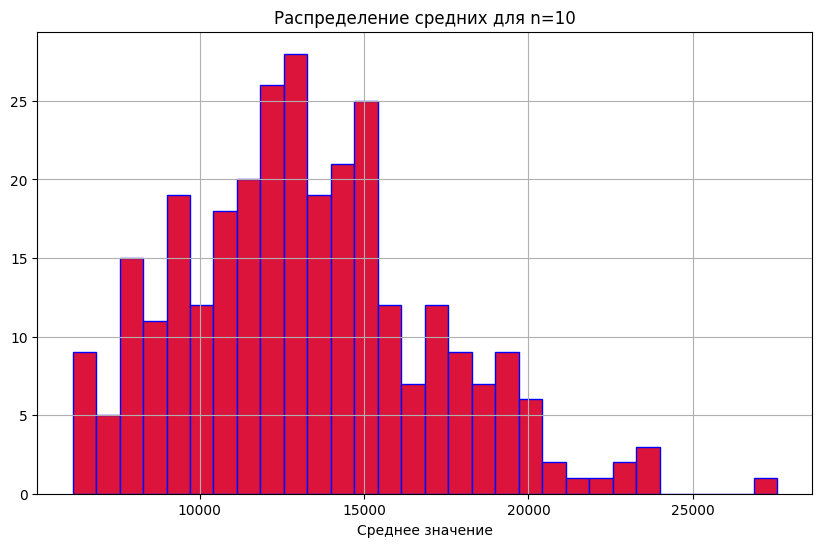

Для выборки размера n=10:
Среднее значение распределения средних: 13256.95
Стандартное отклонение распределения средних: 3781.51
----------------------------------------


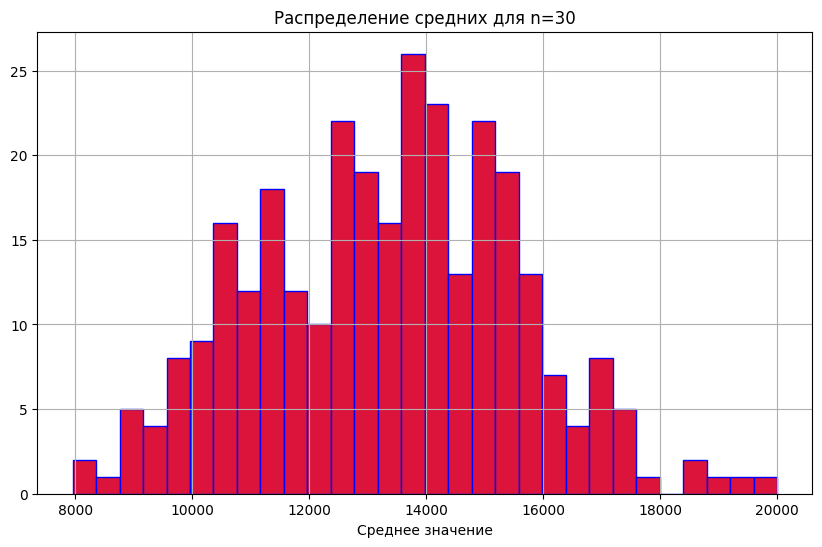

Для выборки размера n=30:
Среднее значение распределения средних: 13325.56
Стандартное отклонение распределения средних: 2223.76
----------------------------------------


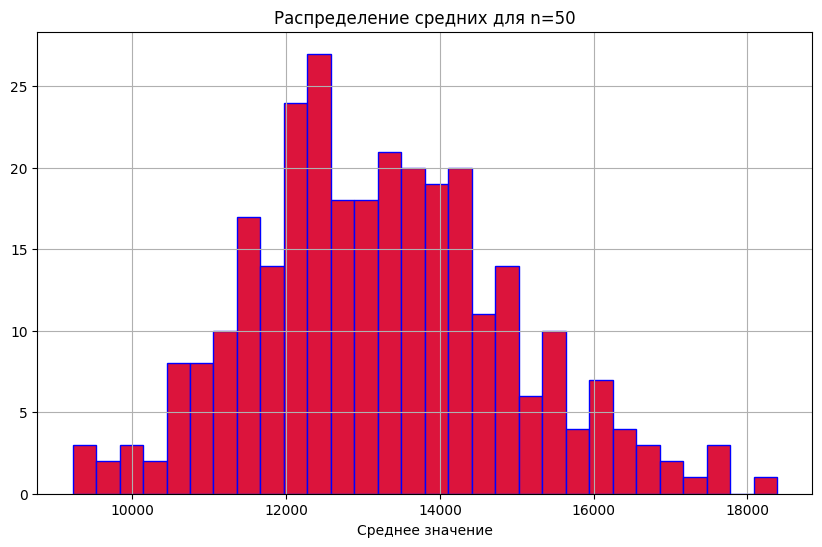

Для выборки размера n=50:
Среднее значение распределения средних: 13217.50
Стандартное отклонение распределения средних: 1680.50
----------------------------------------


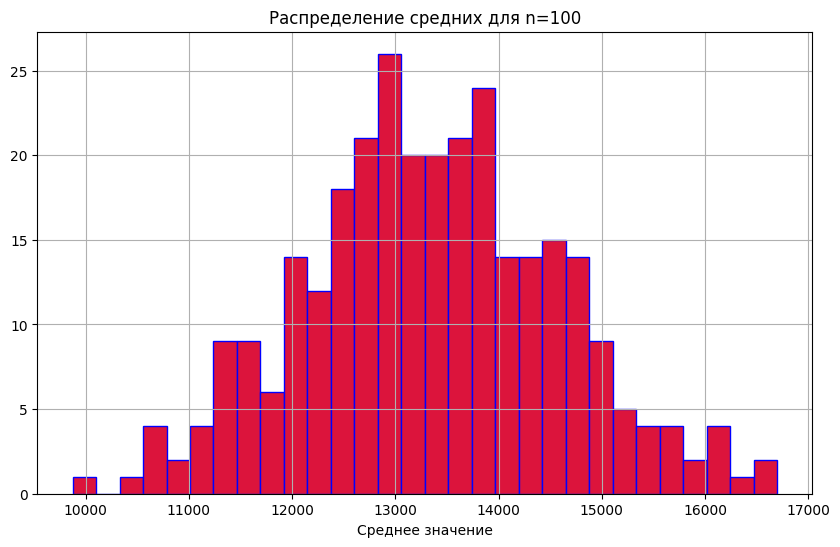

Для выборки размера n=100:
Среднее значение распределения средних: 13349.57
Стандартное отклонение распределения средних: 1229.89
----------------------------------------
BMI


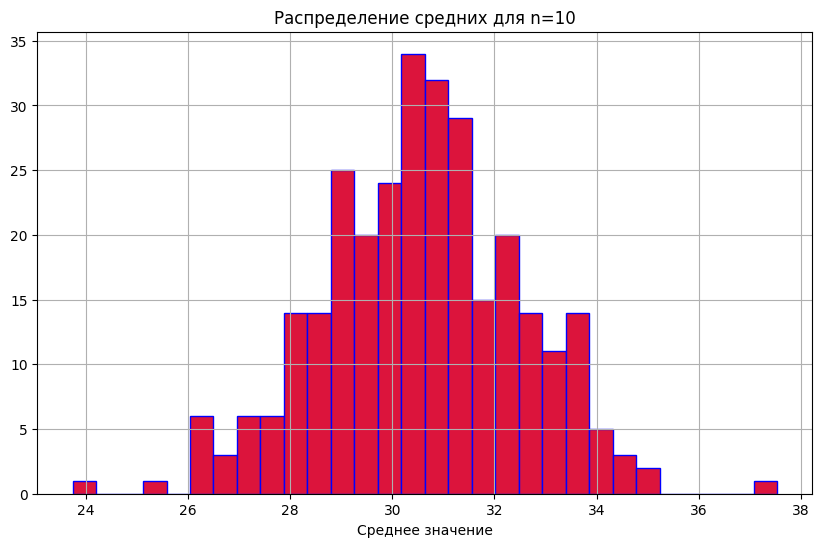

Для выборки размера n=10:
Среднее значение распределения средних: 30.55
Стандартное отклонение распределения средних: 1.95
----------------------------------------


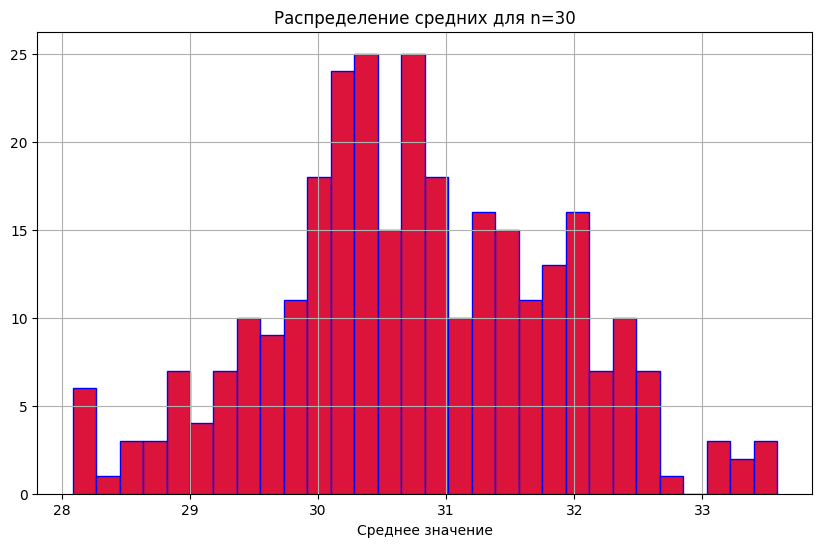

Для выборки размера n=30:
Среднее значение распределения средних: 30.75
Стандартное отклонение распределения средних: 1.11
----------------------------------------


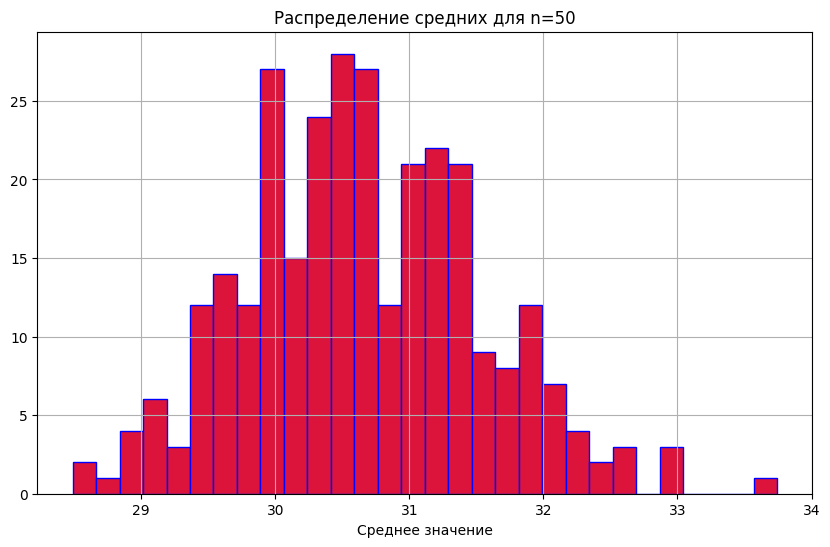

Для выборки размера n=50:
Среднее значение распределения средних: 30.66
Стандартное отклонение распределения средних: 0.88
----------------------------------------


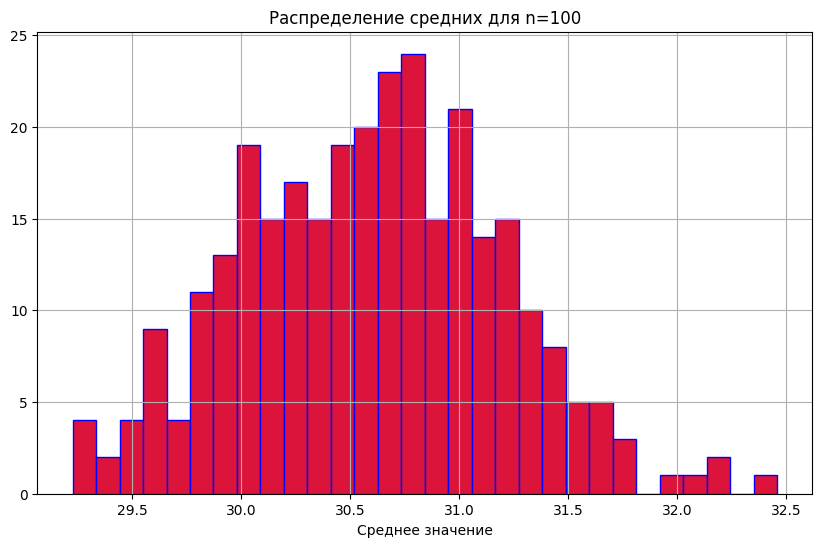

Для выборки размера n=100:
Среднее значение распределения средних: 30.60
Стандартное отклонение распределения средних: 0.59
----------------------------------------


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'insurance.csv'
data = pd.read_csv(file_path)

data_charges = data['charges']
data_bmi = data['bmi']

def central_limit_theorem(feature, sample_sizes, num_samples=300):
    for n in sample_sizes:
        means = []
        
        for _ in range(num_samples):
            sample = feature.sample(n, replace=False)
            means.append(sample.mean())
        
        plt.figure(figsize=(10, 6))
        plt.hist(means, bins=30, color='crimson', edgecolor='blue')
        plt.title(f'Распределение средних для n={n}')
        plt.xlabel('Среднее значение')
        plt.grid(True)
        plt.show()
        
        mean_of_means = np.mean(means)
        std_of_means = np.std(means)
        
        print(f"Для выборки размера n={n}:")
        print(f"Среднее значение распределения средних: {mean_of_means:.2f}")
        print(f"Стандартное отклонение распределения средних: {std_of_means:.2f}")
        print("-" * 40)

sample_sizes = [10, 30, 50, 100]

print("CHARGES")
central_limit_theorem(data_charges, sample_sizes)
print('BMI')
central_limit_theorem(data_bmi, sample_sizes)
